In [ ]:
#Practical Assignment No: 06 
#Implementation of object detection using transfer learning of CNN architectures

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_dir = 'mnist1/mnist_png/train/'
test_dir = 'mnist1/mnist_png/test/'

In [16]:
img_gen = ImageDataGenerator(rescale=1.0/255)

data_gen = img_gen.flow_from_directory(
    train_dir,
    target_size=(32,32),
    batch_size=5000,
    shuffle=True,
    class_mode='categorical'
)

Found 60000 images belonging to 10 classes.


In [18]:
x_train, y_train = data_gen[0]
x_test, y_test = data_gen[2]

In [20]:
from tensorflow.keras.applications import VGG16
path = 'mnist/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

vgg_model = VGG16(weights=path,include_top=False, input_shape=(32,32,3))

In [22]:
for layer in vgg_model.layers:
    layer.trainabler=False

In [24]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [28]:
custom_classifier = keras.Sequential([
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
    
])

model = keras.Sequential([
    vgg_model,
    custom_classifier
])

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(x_train, y_train, batch_size=100, epochs=1, validation_data=(x_test,y_test))

50/50 ━━━━━━━━━━━━━━━━━━━━ 325s 6s/step - accuracy: 0.1142 - loss: 2.5304 - val_accuracy: 0.2282 - val_loss: 1.8997


In [33]:
for layer in vgg_model.layers[:-4]:
    layer.trainable = True
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=1000, epochs=1, validation_data=(x_test,y_test))

5/5 ━━━━━━━━━━━━━━━━━━━━ 369s 78s/step - accuracy: 0.1890 - loss: 2.8210 - val_accuracy: 0.1088 - val_loss: 2.2570


In [76]:
loss, acc = model.evaluate(x_test, y_test)
print(loss, " ", acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 70s 437ms/step - accuracy: 0.2307 - loss: 1.9478
1.9480623006820679   0.2329999953508377


In [34]:
pred = model.predict(x_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 75s 477ms/step


In [38]:
labels = list(data_gen.class_indices.keys())

2


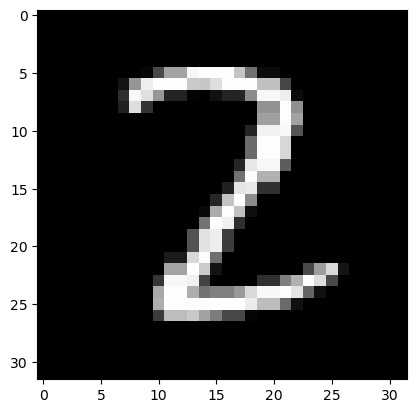

In [48]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(x_test[4])
#plt.title(str(labels[np.argmax(pred[5])]))
print(str(labels[np.argmax(y_test[4])]))

In [52]:
y_test[4]


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)